<a href="https://colab.research.google.com/github/areebaxijaz/AER850-Project-3/blob/main/AER850Project3_100epochTrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/ProjectthreeData/data'
data_yaml_path = f'{base_path}/data.yaml'

In [ ]:
!pip install opencv-python-headless ultralytics torch numpy pillow

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from ultralytics import YOLO
from matplotlib import pyplot as plt



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Step 1: Image Masking using OpenCV

# Load the motherboard image
image_path = '/content/computermotherboard.jpeg'  # Replace with image path
image = cv2.imread(image_path)

# Convert image to grayscale for thresholding
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1.1: Apply thresholding
# Thresholding separates the background from the PCB based on pixel intensity
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Step 1.2: Edge Detection
# Using Canny edge detection to detect the edges of the PCB
edges = cv2.Canny(gray_image, 100, 200)

# Step 1.3: Contour Detection
# Find contours based on the edges detected
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Filter contours by area to remove small irrelevant ones
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]


In [ ]:
# Step 1.4: Creating a mask from the contours
# Create a blank mask with the same dimensions as the image

mask = np.zeros_like(gray_image)

# Draw contours on the mask to isolate the PCB
cv2.drawContours(mask, filtered_contours, -1, (255), 3)

# Step 1.5: Apply the mask to the original image to extract the PCB
pcb_extracted = cv2.bitwise_and(image, image, mask=mask)

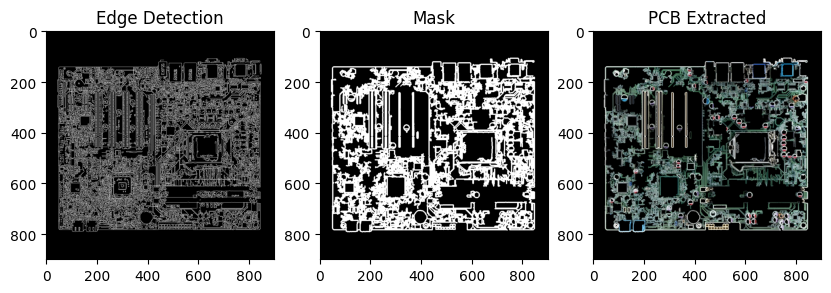

In [ ]:
# Display the masking results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Edge Detection")
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(pcb_extracted, cv2.COLOR_BGR2RGB))
plt.title("PCB Extracted")
plt.show()

In [ ]:
# Step 2: YOLOv8 Training with Google Colab GPU

# Load the YOLOv8 model (nano version)
model = YOLO('yolov8n.pt')


100%|██████████| 6.25M/6.25M [00:00<00:00, 132MB/s]


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
# Training parameters
epochs = 100  # Number of training epochs
batch_size = 10  # Number of images per batch
image_size = 900  # Image size for training

# Start training with data.yaml, which should define paths to train, val, test datasets
model.train(
    data=data_yaml_path,  # Path to data.yaml file in Google Drive
    epochs=epochs,
    batch=batch_size,
    imgsz=image_size,
    name='pcb_component_detection_model100'
)


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ProjectthreeData/data/data.yaml, epochs=100, time=None, patience=100, batch=10, imgsz=900, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_component_detection_model100, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[900] must be multiple of max stride 32, updating to [928]


train: Scanning /content/drive/MyDrive/ProjectthreeData/data/train/labels... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [03:02<00:00,  2.97it/s]


train: New cache created: /content/drive/MyDrive/ProjectthreeData/data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/ProjectthreeData/data/valid/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:34<00:00,  3.05it/s]

val: New cache created: /content/drive/MyDrive/ProjectthreeData/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_component_detection_model100/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 928 train, 928 val
Using 2 dataloader workers
Logging results to runs/detect/pcb_component_detection_model100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.5G      2.157       4.23      1.262       1299        928: 100%|██████████| 55/55 [00:42<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]

                   all        105      19108     0.0298      0.147     0.0481     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      15.2G      2.263      3.182       1.13       1047        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        105      19108     0.0525      0.147     0.0694      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.2G      2.249      2.697      1.104       1306        928: 100%|██████████| 55/55 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        105      19108      0.492      0.132      0.102     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.8G      2.165      2.378      1.086        816        928: 100%|██████████| 55/55 [00:34<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]

                   all        105      19108      0.578      0.135      0.117     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.2G      2.144      2.203      1.081       1088        928: 100%|██████████| 55/55 [00:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

                   all        105      19108      0.609      0.157       0.15     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.5G      2.055      2.054       1.06       1073        928: 100%|██████████| 55/55 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

                   all        105      19108      0.552      0.179      0.176      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.3G      2.024      1.934      1.053       1935        928: 100%|██████████| 55/55 [00:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        105      19108      0.566       0.22      0.199       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.7G      1.968      1.873      1.043       1199        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        105      19108      0.588      0.264      0.236      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.73G       1.95      1.819      1.037        846        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

                   all        105      19108      0.514      0.285      0.239      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.9G      1.943       1.79      1.035       1506        928: 100%|██████████| 55/55 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

                   all        105      19108      0.571      0.291      0.263      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.3G      1.898      1.702      1.014        780        928: 100%|██████████| 55/55 [00:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

                   all        105      19108      0.582      0.289      0.296       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.1G       1.89      1.682      1.019       1352        928: 100%|██████████| 55/55 [00:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        105      19108      0.623      0.323      0.313      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.9G      1.852      1.633      1.014       1441        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        105      19108      0.415      0.332      0.316      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.1G      1.866      1.624      1.007        741        928: 100%|██████████| 55/55 [00:32<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]

                   all        105      19108      0.492      0.336      0.319      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.7G      1.833      1.598      1.004       1329        928: 100%|██████████| 55/55 [00:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        105      19108      0.419      0.369      0.357      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.49G      1.829      1.559      1.003        837        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        105      19108      0.504      0.365       0.36       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      15.4G      1.815       1.55      1.006       1464        928: 100%|██████████| 55/55 [00:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        105      19108      0.468      0.373      0.385       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.8G      1.786      1.511     0.9885       1082        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        105      19108      0.471      0.387      0.387      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.8G      1.799      1.492     0.9904       1154        928: 100%|██████████| 55/55 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.27s/it]

                   all        105      19108      0.504      0.417      0.409      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.5G      1.782       1.48     0.9971        951        928: 100%|██████████| 55/55 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        105      19108      0.555      0.395      0.401      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.7G      1.767      1.474     0.9894       1009        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        105      19108        0.6      0.418      0.423      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.8G      1.743      1.428     0.9885        883        928: 100%|██████████| 55/55 [00:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        105      19108      0.491      0.431       0.43      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.8G      1.731      1.433     0.9862       1007        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.07s/it]

                   all        105      19108      0.611      0.411      0.421      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.41G       1.76      1.418     0.9834        890        928: 100%|██████████| 55/55 [00:31<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

                   all        105      19108      0.547      0.411       0.43      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.2G      1.727      1.392     0.9784       1272        928: 100%|██████████| 55/55 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        105      19108      0.611      0.415      0.461       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.4G      1.708      1.392     0.9807       1334        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]

                   all        105      19108      0.612      0.445       0.47      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        14G      1.726      1.377     0.9763       1186        928: 100%|██████████| 55/55 [00:32<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        105      19108      0.511       0.46      0.477      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G      1.724      1.354     0.9802        668        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        105      19108       0.58      0.449      0.478      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      15.4G      1.716      1.353     0.9713       1429        928: 100%|██████████| 55/55 [00:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.16s/it]

                   all        105      19108      0.627      0.436      0.463      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.9G      1.741      1.352     0.9795       1026        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        105      19108      0.552      0.487      0.497      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.4G      1.709      1.345     0.9715       1093        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        105      19108        0.5      0.517      0.516       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.6G        1.7      1.303     0.9696       1385        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        105      19108        0.6      0.484      0.515      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.2G      1.689      1.313     0.9687        810        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        105      19108      0.595      0.482      0.518      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.9G      1.674      1.295     0.9629       1208        928: 100%|██████████| 55/55 [00:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

                   all        105      19108      0.619      0.478      0.522      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      15.2G      1.664      1.284     0.9582       1115        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        105      19108      0.586      0.471      0.509       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        13G      1.662      1.256     0.9622       1297        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]

                   all        105      19108      0.642      0.492      0.532      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        13G      1.666       1.27     0.9596       1159        928: 100%|██████████| 55/55 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        105      19108      0.645      0.503      0.533      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.1G       1.67      1.266     0.9637       1114        928: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        105      19108      0.635      0.529      0.557      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.2G      1.659      1.242     0.9595       1180        928: 100%|██████████| 55/55 [00:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

                   all        105      19108       0.57      0.529       0.55      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.5G      1.648      1.233     0.9567        486        928: 100%|██████████| 55/55 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.11s/it]

                   all        105      19108      0.607      0.545      0.571      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.3G      1.637      1.228     0.9567        690        928: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        105      19108      0.622      0.543       0.58      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.9G      1.638      1.215     0.9584       1131        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        105      19108      0.688       0.51      0.578      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.1G      1.642      1.212     0.9567       1148        928: 100%|██████████| 55/55 [00:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        105      19108      0.634      0.538      0.578      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      15.2G       1.65      1.206     0.9562        685        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        105      19108       0.69      0.545      0.588      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.2G      1.612      1.178     0.9505        979        928: 100%|██████████| 55/55 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        105      19108      0.678      0.557      0.604      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.8G      1.627      1.182     0.9458       1142        928: 100%|██████████| 55/55 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        105      19108      0.665      0.561      0.605      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.1G      1.637      1.195      0.947       1656        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        105      19108      0.661      0.587      0.614      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.9G      1.584      1.168     0.9469       1208        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        105      19108      0.693       0.57      0.618      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.6G      1.627      1.192     0.9477        727        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        105      19108      0.649      0.582      0.612      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.9G      1.604      1.173      0.949        721        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        105      19108      0.614      0.597      0.609      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.1G      1.596      1.162     0.9484       1418        928: 100%|██████████| 55/55 [00:32<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        105      19108      0.714      0.555      0.611      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.1G      1.587      1.149     0.9424        659        928: 100%|██████████| 55/55 [00:32<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        105      19108      0.696      0.568      0.611      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.5G      1.583      1.138     0.9424       1382        928: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        105      19108      0.697      0.587      0.629      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.4G      1.596      1.145      0.943       1279        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        105      19108       0.73      0.583      0.639       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.9G      1.577      1.128     0.9397       1494        928: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        105      19108      0.672      0.596      0.636      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.4G      1.568      1.117     0.9409       1486        928: 100%|██████████| 55/55 [00:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        105      19108      0.716      0.592      0.642      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      15.1G       1.56      1.117     0.9407       1064        928: 100%|██████████| 55/55 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.10s/it]

                   all        105      19108      0.677       0.58       0.63      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.18G      1.568      1.111     0.9446        945        928: 100%|██████████| 55/55 [00:31<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        105      19108        0.7      0.599      0.628      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.1G      1.595      1.123     0.9392       1412        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]

                   all        105      19108      0.701      0.605      0.641      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.6G      1.569      1.103     0.9372       1725        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        105      19108      0.713      0.613      0.647       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.2G      1.575       1.11     0.9349        966        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]

                   all        105      19108      0.685      0.613      0.638      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.8G      1.552      1.079     0.9342       1260        928: 100%|██████████| 55/55 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        105      19108      0.731      0.602      0.652       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.8G      1.567      1.108     0.9354       1118        928: 100%|██████████| 55/55 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        105      19108      0.712      0.618      0.649      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      15.5G       1.55      1.088     0.9347       1615        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        105      19108       0.71      0.607      0.649      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      15.5G      1.564      1.096     0.9348        868        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]


                   all        105      19108      0.727      0.612      0.656      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.6G       1.54      1.079     0.9311        919        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]


                   all        105      19108       0.74      0.628       0.67      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.69G      1.556      1.075     0.9312        522        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        105      19108       0.77      0.596      0.664      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.43G       1.53      1.073     0.9306        739        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        105      19108      0.726      0.629      0.674      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.4G      1.532      1.048     0.9293        951        928: 100%|██████████| 55/55 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        105      19108      0.765      0.607       0.67      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.2G      1.522      1.049     0.9259       1106        928: 100%|██████████| 55/55 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]

                   all        105      19108      0.738      0.613      0.665      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.6G      1.526      1.053      0.925        591        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]


                   all        105      19108      0.759      0.627      0.681      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.4G      1.524       1.06     0.9361        703        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]


                   all        105      19108      0.762      0.615      0.669      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.5G      1.535      1.059     0.9276       1382        928: 100%|██████████| 55/55 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]


                   all        105      19108      0.754      0.638      0.686      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        14G      1.512      1.032     0.9278        559        928: 100%|██████████| 55/55 [00:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        105      19108      0.799      0.617      0.683      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.5G      1.518      1.043     0.9305        920        928: 100%|██████████| 55/55 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

                   all        105      19108      0.742      0.631      0.681      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      15.1G      1.505      1.031     0.9227        843        928: 100%|██████████| 55/55 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        105      19108       0.76      0.634      0.688       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.1G      1.513      1.036     0.9271       1582        928: 100%|██████████| 55/55 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]

                   all        105      19108      0.783      0.624      0.687      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.5G      1.492      1.026     0.9246       1481        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        105      19108      0.753      0.633      0.686      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.8G      1.535      1.055       0.93       1343        928: 100%|██████████| 55/55 [00:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]

                   all        105      19108      0.764       0.63      0.689      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.9G      1.503      1.019     0.9285       1003        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        105      19108      0.767      0.627      0.693      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.4G      1.496      1.017     0.9196       2226        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        105      19108      0.815      0.627      0.694      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.5G      1.498      1.022     0.9241       1178        928: 100%|██████████| 55/55 [00:32<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

                   all        105      19108      0.777      0.631      0.691      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.8G      1.479      1.003     0.9225        941        928: 100%|██████████| 55/55 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]


                   all        105      19108      0.767      0.638      0.695      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.2G      1.487      1.019     0.9187       1134        928: 100%|██████████| 55/55 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]

                   all        105      19108      0.763      0.644      0.697      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.6G       1.49      1.006     0.9195       1601        928: 100%|██████████| 55/55 [00:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]


                   all        105      19108      0.786      0.627      0.692      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.1G      1.475     0.9947     0.9151       1379        928: 100%|██████████| 55/55 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        105      19108       0.81      0.629      0.701        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.1G      1.479          1     0.9212        751        928: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        105      19108      0.791       0.64      0.704      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.58G      1.483      1.006      0.916        677        928: 100%|██████████| 55/55 [00:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all        105      19108       0.77      0.653      0.705      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.5G      1.481      1.003      0.917        900        928: 100%|██████████| 55/55 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]

                   all        105      19108      0.764      0.649        0.7        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.9G      1.494      0.998     0.9191       2289        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        105      19108      0.791      0.637        0.7      0.499


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.5G       1.52      1.075     0.9314        651        928: 100%|██████████| 55/55 [00:38<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        105      19108      0.752      0.647      0.691      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       8.1G      1.503      1.028     0.9227        983        928: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        105      19108      0.746      0.634      0.689      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.2G      1.491      1.008     0.9225        767        928: 100%|██████████| 55/55 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        105      19108      0.745      0.643      0.692      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.24G      1.482      1.007     0.9181        854        928: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        105      19108      0.782      0.634      0.698      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.6G      1.467     0.9937     0.9136        655        928: 100%|██████████| 55/55 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]

                   all        105      19108      0.763      0.639      0.695      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.76G      1.482     0.9934       0.92        997        928: 100%|██████████| 55/55 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]

                   all        105      19108      0.782      0.636      0.696      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.76G      1.464     0.9853     0.9178        634        928: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        105      19108      0.783      0.634      0.697      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.8G      1.457     0.9821     0.9113        722        928: 100%|██████████| 55/55 [00:30<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        105      19108      0.759      0.647      0.698      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.3G      1.466     0.9837     0.9137        610        928: 100%|██████████| 55/55 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        105      19108       0.76      0.645        0.7      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.3G      1.469      1.002     0.9176        627        928: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        105      19108      0.776       0.64      0.699      0.504



100 epochs completed in 1.105 hours.
Optimizer stripped from runs/detect/pcb_component_detection_model100/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/pcb_component_detection_model100/weights/best.pt, 6.3MB

Validating runs/detect/pcb_component_detection_model100/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:31<00:00,  5.28s/it]


                   all        105      19108      0.794      0.638      0.704      0.504
                Button         14         45      0.832      0.956       0.98       0.83
             Capacitor        104       7251      0.757        0.4      0.545      0.281
             Connector         76        659       0.77      0.894      0.896      0.673
                 Diode         11         53      0.769      0.396      0.407      0.287
Electrolytic Capacitor         15        160      0.863      0.869      0.928      0.639
                    IC         95       1322      0.815       0.89      0.914      0.689
              Inductor         12         45      0.886      0.516      0.709      0.551
                   Led         18        127      0.783       0.63      0.701      0.487
                  Pads         20        143      0.803      0.171      0.269      0.183
                  Pins         10        151      0.634      0.834      0.813      0.588
              Resisto

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7926bb379750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [ ]:
# Step 3: YOLOv8 Evaluation on Test Images

# Paths to test images for evaluation
test_image_paths = [
    f'{base_path}/evaluation/ardmega.jpg',
    f'{base_path}/evaluation/arduno.jpg',
    f'{base_path}/evaluation/rasppi.jpg'
]


image 1/1 /content/drive/MyDrive/ProjectthreeData/data/evaluation/ardmega.jpg: 832x928 1 Button, 5 Capacitors, 9 Connectors, 7 ICs, 12 Resistors, 58.0ms
Speed: 10.0ms preprocess, 58.0ms inference, 2.3ms postprocess per image at shape (1, 3, 832, 928)


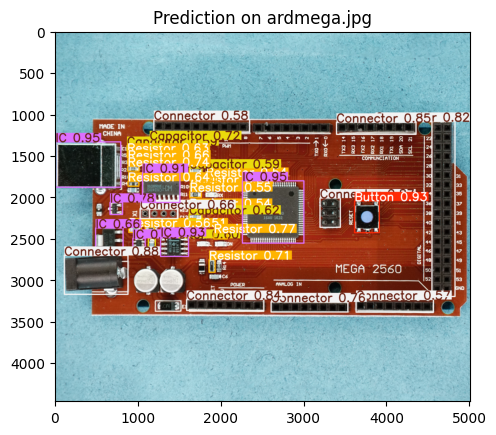


image 1/1 /content/drive/MyDrive/ProjectthreeData/data/evaluation/arduno.jpg: 640x928 8 Capacitors, 8 Connectors, 2 Electrolytic Capacitors, 5 ICs, 1 Led, 4 Resistors, 57.6ms
Speed: 6.0ms preprocess, 57.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 928)


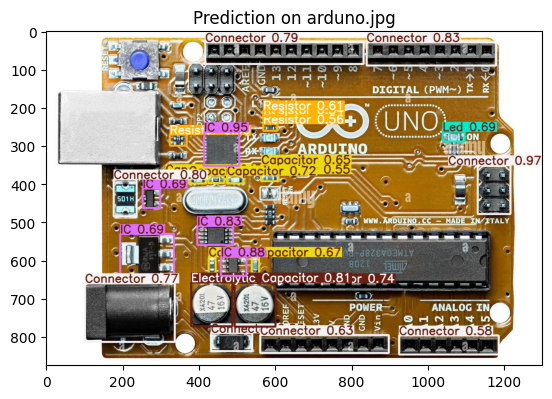


image 1/1 /content/drive/MyDrive/ProjectthreeData/data/evaluation/rasppi.jpg: 640x928 5 Capacitors, 7 Connectors, 1 Electrolytic Capacitor, 6 ICs, 4 Resistors, 8.6ms
Speed: 4.3ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 928)


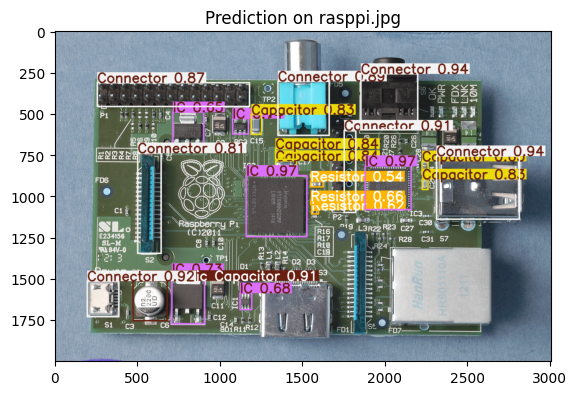

In [ ]:
# Evaluate each test image
for image_path in test_image_paths:
    results = model.predict(source=image_path, conf=0.5)  # Confidence threshold at 0.5

    # Display prediction results
    for result in results:
        plt.imshow(result.plot())  # Plot prediction results on the image
        plt.title(f"Prediction on {image_path.split('/')[-1]}")
        plt.show()